In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl

from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [6]:
data_file = './data/GSE66099.csv'
degs_file = './gene_diff_data.csv'
# data pre-processing
norm_filter = MinMaxScaler()

label = 'Died'
num_features = 10

DEGs = pd.read_csv(degs_file)
degs_gene_id = DEGs["X"]

data = pd.read_csv(data_file)
degs_gene_data = data[degs_gene_id]
degs_gene_data["label"]  = data[label]
degs_gene_data


<ipython-input-6-cc550c6d2cf5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degs_gene_data["label"]  = data[label]


,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,label
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


In [7]:
# train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# y = degs_gene_data.iloc[:,108].values
X, y = degs_gene_data.iloc[:,0:107].values, degs_gene_data.iloc[:,108].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123,
                                                   shuffle=True, stratify=y )
X[:,0]

array([ 7.83775973,  7.75198314, 10.27905306,  9.60160927,  7.78519525,
        5.14753555,  7.14121395, 11.38452663,  8.26078177,  6.22483544,
        6.46213086,  7.79898583,  4.20774828,  7.07662203,  3.93496862,
        6.60139579,  3.97741554,  6.49158695,  8.16663839,  9.07082746,
        5.01822753,  8.25139113,  6.27991797,  9.44387897,  8.43953965,
        6.67005359,  8.2200189 ,  9.72462787,  7.56828044,  6.6055124 ,
        7.65395323,  5.93015729,  7.287119  ,  3.26349989,  8.1171794 ,
        4.62516107,  4.11643358,  3.59600687,  8.07753005,  6.01667048,
        7.04779533,  8.38746683,  7.79722778,  5.72060779,  6.28258969,
        7.2374142 ,  6.49645489,  3.61215667,  5.97706047,  3.84253424,
        9.66056183,  3.00023329,  4.58147715,  8.71223199,  7.74541413,
        5.02613673,  6.83645476,  5.73876807,  5.89086525,  6.73654376,
        4.76253428,  9.6712716 ,  4.0463812 ,  7.44242834,  7.45057279,
        7.41139449,  6.0985281 ,  5.41118317,  6.05895461,  6.65

<BarContainer object of 159 artists>

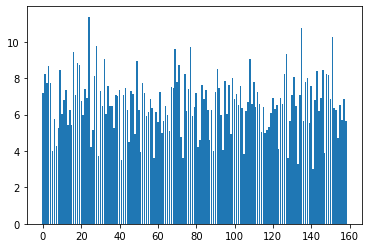

In [8]:
# SLC39A8 before normalization
plt.bar(list(range(159)),X_train[:,0])



In [6]:
# X_train = preprocessing.normalize(X_train, axis=0)
# X_test = preprocessing.normalize(X_test, axis=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
# X_train
# X_test.shape
# X_train.shape

<BarContainer object of 159 artists>

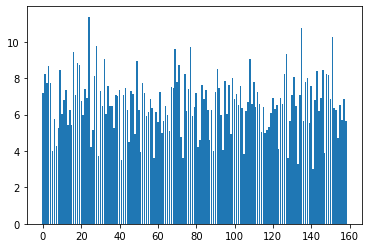

In [7]:
plt.bar(list(range(159)),X_train[:,0])
# X_train[:,0].shape

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 10, p = 2) #p = 2:distance cal by norm 2
# can adding weight for ranking neighbor data point by distance the more near data point the most coefficient 
model.fit(X_train_std, y_train)

print('Training accuracy:', np.mean(model.predict(X_train_std) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_std) == y_test)*100)

Training accuracy: 86.79245283018868
Test accuracy: 85.0


In [9]:
# selecting feature
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(model,
          k_features = 3,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          n_jobs=-1,
          cv=10)
sfs1 = sfs1.fit(X_train_std, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    2.2s finished

[2022-03-06 21:41:18] Features: 1/3 -- score: 0.8741666666666668[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    0.4s finished

[2022-03-06 21:41:18] Features: 2/3 -- score: 0.8741666666666668[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.4s finished

[2022-03-06 21:41:18] Features: 3/3 -- score: 0.8991666666666667

In [10]:
sfs1.subsets_

{1: {'feature_idx': (6,),
  'cv_scores': array([0.8125    , 0.875     , 0.875     , 0.9375    , 0.875     ,
         0.875     , 0.9375    , 0.8125    , 0.875     , 0.86666667]),
  'avg_score': 0.8741666666666668,
  'feature_names': ('6',)},
 2: {'feature_idx': (6, 50),
  'cv_scores': array([0.8125    , 0.875     , 0.9375    , 0.875     , 0.9375    ,
         0.875     , 0.875     , 0.875     , 0.8125    , 0.86666667]),
  'avg_score': 0.8741666666666668,
  'feature_names': ('6', '50')},
 3: {'feature_idx': (6, 50, 96),
  'cv_scores': array([0.875     , 0.9375    , 0.875     , 1.        , 0.9375    ,
         0.8125    , 0.875     , 0.875     , 0.9375    , 0.86666667]),
  'avg_score': 0.8991666666666667,
  'feature_names': ('6', '50', '96')}}

In [11]:
sfs1.k_feature_idx_

(6, 50, 96)

In [12]:
degs_gene_data.columns[1:][list(sfs1.k_feature_idx_)]

Index(['MAFF', 'NEK2', 'RAD51'], dtype='object')

In [13]:
X_train_sele = sfs1.transform(X_train)
X_test_sele = sfs1.transform(X_test)


In [14]:
# fit selection data to model
model.fit(X_train_sele, y_train)
print('Training accuracy:', np.mean(model.predict(X_train_sele) == y_train)*100)
print('Test accuracy:', np.mean(model.predict(X_test_sele) == y_test)*100)

Training accuracy: 89.30817610062893
Test accuracy: 85.0


In [15]:
# Inspect result
sfs1.subsets_

{1: {'feature_idx': (6,),
  'cv_scores': array([0.8125    , 0.875     , 0.875     , 0.9375    , 0.875     ,
         0.875     , 0.9375    , 0.8125    , 0.875     , 0.86666667]),
  'avg_score': 0.8741666666666668,
  'feature_names': ('6',)},
 2: {'feature_idx': (6, 50),
  'cv_scores': array([0.8125    , 0.875     , 0.9375    , 0.875     , 0.9375    ,
         0.875     , 0.875     , 0.875     , 0.8125    , 0.86666667]),
  'avg_score': 0.8741666666666668,
  'feature_names': ('6', '50')},
 3: {'feature_idx': (6, 50, 96),
  'cv_scores': array([0.875     , 0.9375    , 0.875     , 1.        , 0.9375    ,
         0.8125    , 0.875     , 0.875     , 0.9375    , 0.86666667]),
  'avg_score': 0.8991666666666667,
  'feature_names': ('6', '50', '96')}}

In [4]:
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
metric_dict

NameError: name 'sfs1' is not defined

In [3]:
df = pd.DataFrame.from_dict(metric_dict).T
df.iloc[,[1]]

NameError: name 'metric_dict' is not defined

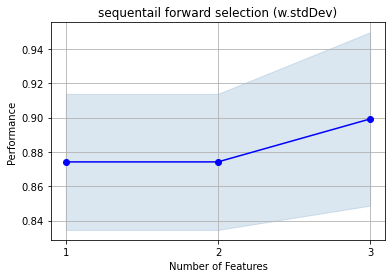

In [18]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(metric_dict, kind='std_dev')
plt.title('sequentail forward selection (w.stdDev)')
plt.grid()
plt.show()

In [193]:
from mlxtend.math import num_combinations

all_comb = np.sum([num_combinations(n=X.shape[1], k=i)
                  for i in range(1, X.shape[1] + 1)])
all_comb


162259276829213363391578010288127